In [ ]:
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', 100)
from sklearn.feature_extraction.text import CountVectorizer


nltk.download('wordnet')

# gdown.download('https://drive.google.com/uc?id=1q4U2gVY9tWEPdT6W-pdQpKmo152QqWLE', 'finance_train.csv', True)
# gdown.download('https://drive.google.com/uc?id=1nIBqAsItwVEGVayYTgvybz7HeK0asom0', 'finance_test.csv', True)

def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

def plot_word_cloud(text):
  text = text.Sentence.values
  wordcloud = WordCloud(
      width = 3000,
      height = 2000,
      background_color = 'black',
      stopwords = STOPWORDS).generate(str(text))
  fig = plt.figure(
      figsize = (10, 7),
      facecolor = 'k',
      edgecolor = 'k')
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

def preprocess_data(df):
  sentences = df.Sentence.values
  labels = df.Label.values
  tokenized_sentences = [word_tokenize(word) for word in sentences]
  filtered_sentences = [remove_stopwords(word) for word in tokenized_sentences]
  return filtered_sentences, labels

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(14,12))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()

LABEL_MAP = {0 : "negative", 1 : "neutral", 2 : "positive"}
STOPWORD_SET = set(stopwords.words('english'))
SAMPLE_SENTENCE = word_tokenize('I need to remove all these meaningless stopwords.')
SAMPLE_SOLUTION = ['I', 'need', 'remove', 'meaningless', 'stopwords', '.']


print ("Train & Test Files are loaded")

In [ ]:
df_train = get_finance_train()
print(df_train.head())

                                                                                              Sentence  \
0                                                 Autotank Group is part of Aspo 's Systems Division .   
1  The contract includes design , construction , delivery of equipment , installation and commissio...   
2  Rapala said it estimates it will make savings of 1-2 mln eur a year by centralising its French o...   
3  The share capital of Alma Media Corporation (business ID 1944757-4)is EUR 45,031,513.80 and it i...   
4  The financial impact is estimated to be some 1.5 MEUR annual improvement in the division 's resu...   

   Label  
0      1  
1      1  
2      2  
3      1  
4      2  


In [ ]:
print('There are a total of {} examples in the Finance Train dataset.'.format(df_train.shape[0]))

There are a total of 2037 examples in the Finance Train dataset.


In [ ]:
df_test = get_finance_test()
print(df_test.head())

                                                                                              Sentence  \
0  In the third quarter of 2010 , net sales increased by 5.2 % to EUR 205.5 mn , and operating prof...   
1  Foundries division reports its sales increased by 9.7 % to EUR 63.1 mn from EUR 57.5 mn in the c...   
2                                               Financing of the project will come mainly from China .   
3  Sukhraj Dulai , of the 2900 block of Boni Sue Court , a cul-de-sac on the city 's north side , s...   
4  Finland 's leading metals group Outokumpu said its fourth-quarter net profit more than tripled o...   

   Label  
0      2  
1      2  
2      1  
3      1  
4      2  


In [ ]:
print('There are a total of {} examples in the Finance Test dataset.'.format(df_test.shape[0]))

There are a total of 227 examples in the Finance Test dataset.


In [ ]:
print(LABEL_MAP)

{0: 'negative', 1: 'neutral', 2: 'positive'}


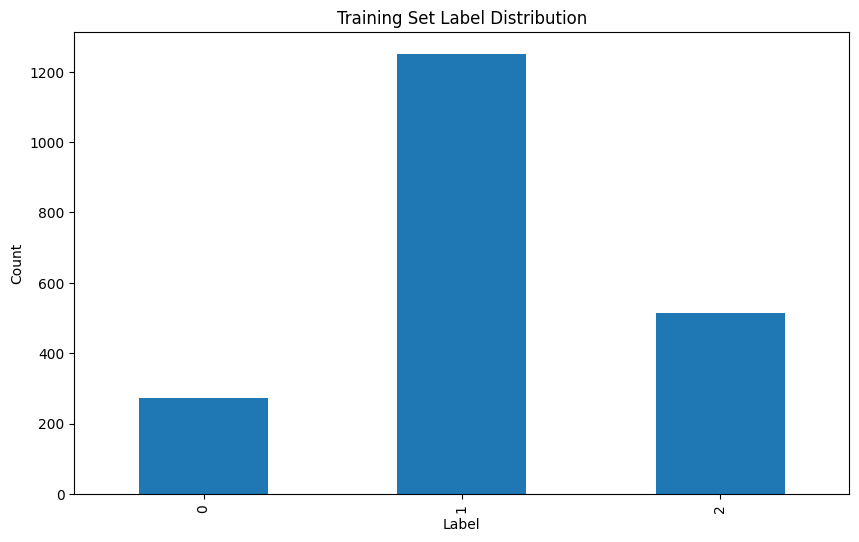

In [ ]:

fig = plt.figure(figsize=(10,6))
plt.title('Training Set Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
df_train.groupby('Label').Sentence.count().plot.bar(ylim=0)
plt.show()

In [ ]:
negative_data = df_train[df_train['Label'] == 0]

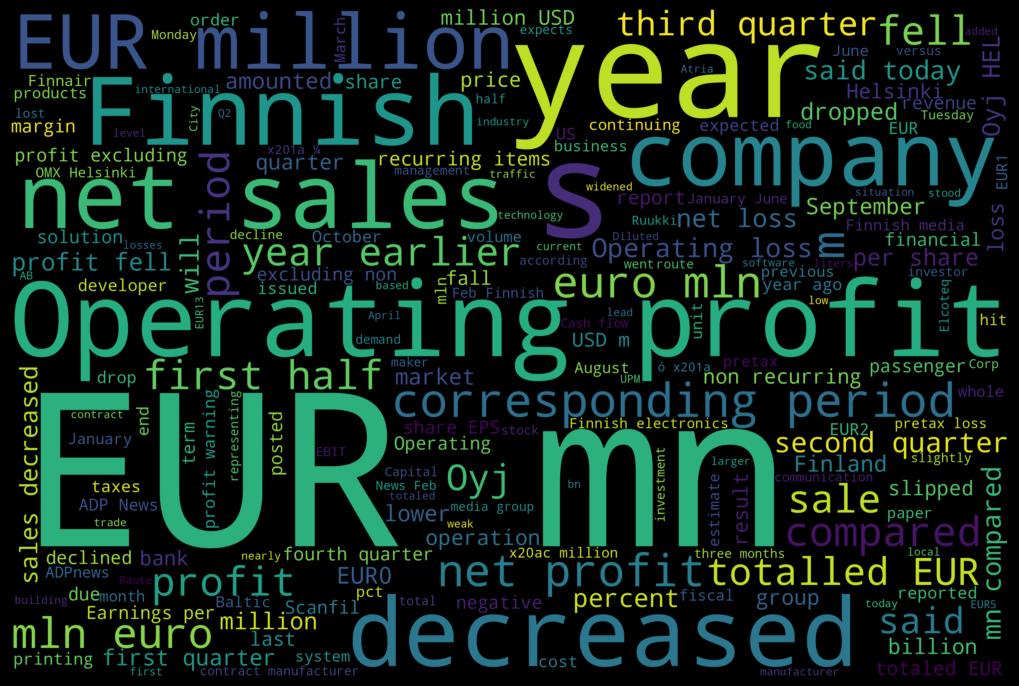

In [ ]:
plot_word_cloud(negative_data)

In [ ]:
positive_data = df_train[df_train['Label'] == 2]

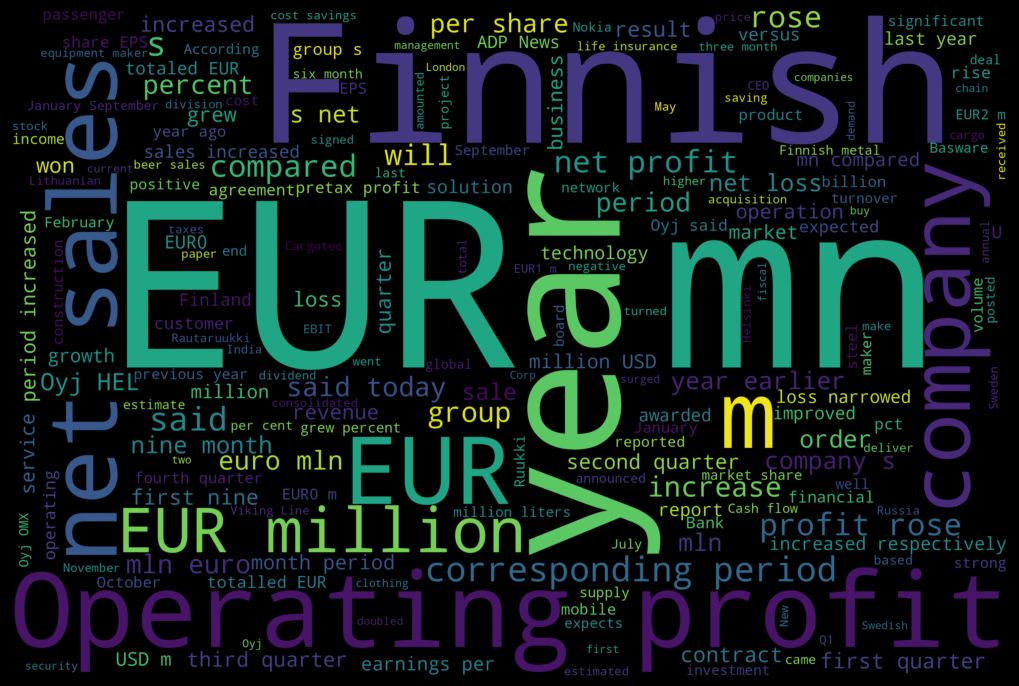

In [ ]:
plot_word_cloud(positive_data)

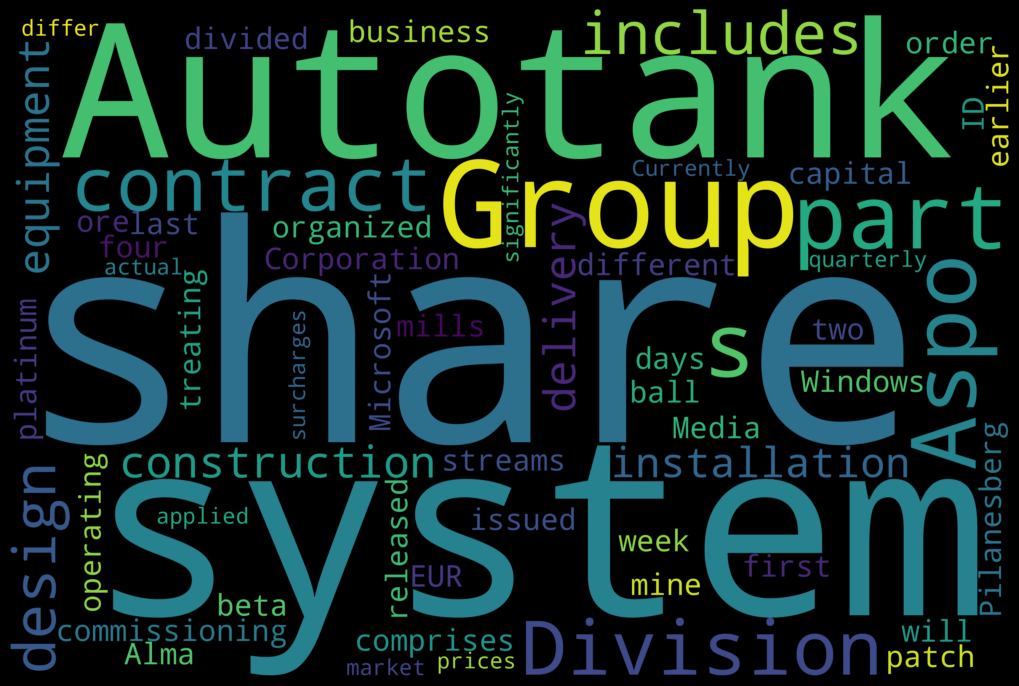

In [ ]:
neutral_data = df_train[df_train['Label'] == 1]
plot_word_cloud(neutral_data)

In [ ]:
sentence = "Your sentence here!\"" #@param {type:'string'}
tokens = word_tokenize(sentence)
tokens

['Your', 'sentence', 'here', '!', "''"]

In [ ]:
#@title Stem words { run: "auto", vertical-output: true, display-mode: "form" }
stemmer = PorterStemmer()
word = "Stemming\"" #@param {type:"string"}
print(stemmer.stem(word[:-1]))


stem


In [ ]:
print(STOPWORD_SET)

{'those', 'only', 'under', 'it', "it's", 'any', 's', 'mightn', "that'll", "hadn't", 'mustn', 'by', 'should', "wasn't", 'as', 'up', 'myself', "doesn't", 'she', 'are', 'or', 'into', 'more', 'has', "isn't", 'than', 'of', 'ma', 'very', 'won', 'after', 'they', 'o', 'with', 'herself', 'not', 've', 'my', "didn't", 'yourself', 'for', 'didn', 'wasn', 'these', "shan't", 'd', 'me', 'being', 'no', "won't", 'his', 'before', 'am', 'himself', 'have', 'needn', 'if', 'were', 'your', 'such', 'against', 'did', 'don', 'wouldn', 'was', 'ain', 'out', 'below', 'be', 'yours', 't', 'most', "haven't", "mustn't", 'y', 'ourselves', 'same', 'hasn', "couldn't", 'haven', 'her', 'a', 'can', "hasn't", 'whom', 'had', 'what', 'the', 're', "wouldn't", 'here', 'how', 'between', 'on', 'our', 'this', 'itself', 'you', 'once', 'its', 'from', 'hadn', 'having', 'couldn', 'he', 'own', 'them', 'until', 'aren', 'at', "weren't", 'now', 'that', 'there', 'is', 'doing', 'their', "you'd", 'we', 'in', "should've", 'about', 'shan', 'hers

In [ ]:
#@title Check If Stopword { run: "auto", vertical-output: true, display-mode: "form" }
word = "stopword\"" #@param {type:"string"}
if not word: raise Exception('Please enter a word')
eng_stopwords = set(stopwords.words('english'))
if word[:-1].lower().strip() in eng_stopwords: print('Yes,\"{}'' is a stopword.'.format(word))
else: print('No,\"{}'' is NOT a stopword.'.format(word))



No,"stopword" is NOT a stopword.


In [ ]:
print('Sample Input:\t{}'.format(SAMPLE_SENTENCE))
print('Sample Output:\t{}'.format(SAMPLE_SOLUTION))

Sample Input:	['I', 'need', 'to', 'remove', 'all', 'these', 'meaningless', 'stopwords', '.']
Sample Output:	['I', 'need', 'remove', 'meaningless', 'stopwords', '.']


In [ ]:
def remove_stopwords(tokenized_sentence):
  filtered_sentence = []
  for w in tokenized_sentence:
    if w not in STOPWORD_SET: filtered_sentence.append(w)
  return filtered_sentence

In [ ]:
remove_stopwords(SAMPLE_SENTENCE)

['I', 'need', 'remove', 'meaningless', 'stopwords', '.']

In [ ]:
train_sentences, train_labels = preprocess_data(df_train)
for sentence in train_sentences[:3]:
    print(sentence)

['Autotank', 'Group', 'part', 'Aspo', "'s", 'Systems', 'Division', '.']
['The', 'contract', 'includes', 'design', ',', 'construction', ',', 'delivery', 'equipment', ',', 'installation', 'commissioning', '.']
['Rapala', 'said', 'estimates', 'make', 'savings', '1-2', 'mln', 'eur', 'year', 'centralising', 'French', 'operations', 'one', 'site', '.']


In [ ]:
test_sentences, test_labels = preprocess_data(df_test)
for sentence in test_sentences[:3]:
    print(sentence)

['In', 'third', 'quarter', '2010', ',', 'net', 'sales', 'increased', '5.2', '%', 'EUR', '205.5', 'mn', ',', 'operating', 'profit', '34.9', '%', 'EUR', '23.5', 'mn', '.']
['Foundries', 'division', 'reports', 'sales', 'increased', '9.7', '%', 'EUR', '63.1', 'mn', 'EUR', '57.5', 'mn', 'corresponding', 'period', '2006', ',', 'sales', 'Machine', 'Shop', 'division', 'increased', '16.4', '%', 'EUR', '41.2', 'mn', 'EUR', '35.4', 'mn', 'corresponding', 'period', '2006', '.']
['Financing', 'project', 'come', 'mainly', 'China', '.']


In [ ]:
# List of sentences
all_sentences = ["Google AI made remarkable achievements in 2019.", "Google Stock was at its all time high"]

#Create instance of CountVectorizer() object
vectorizer = CountVectorizer()

In [ ]:
# Tokenizes the text and builds the vocabulary
vectorizer.fit(all_sentences)

CountVectorizer()

In [ ]:
# Encode sentences as a vectors
bag_of_words_matrix = vectorizer.transform(all_sentences).toarray()

# Print vectors
print(bag_of_words_matrix)

[[1 1 1 0 0 1 0 1 0 1 1 0 0 0]
 [0 0 0 1 1 1 1 0 1 0 0 1 1 1]]


In [ ]:
print(bag_of_words_matrix.shape)

(2, 14)


In [ ]:
def train_model(train_sentences, train_labels):
  """
  param: train_sentences - list of pre-processed sentences to train on
  param: train_labels - list of labels (positive, neutral, negative) for each sentence in train_sentences
  return: the vectorizer, the Logistic Regression model
  """
  train_sentences = [" ".join(t) for t in train_sentences]
  train_labels = [l for l in train_labels]
  vectorizer = CountVectorizer()
  vectorizer.fit(train_sentences)
  train_vect = vectorizer.transform(train_sentences)
  #NOTE: Can also use train_vect = vectorizer.fit_transform(train_sentences)
  model = LogisticRegression()
  model.fit(train_vect, train_labels)
  return model, vectorizer

In [ ]:
model, train_vectorizer = train_model(train_sentences, train_labels)

In [ ]:
def predict(test_sentences, test_labels, vectorizer, model):
  """
  param: test_sentences - list of pre-processed sentences to test the model
  param: vectorizer - the CountVectorizer from the train_model function
  param: model - the Logistic Regression model from the train_model function
  return: preds - the predictions of the model based on test_sentences
  """
  test_sentences = [" ".join(t) for t in  test_sentences]
  test_vect = vectorizer.transform(test_sentences)
  preds = model.predict(test_vect)
  acc = metrics.accuracy_score(test_labels, preds)
  return preds, acc

In [ ]:
y_predictions, test_accuracy = predict(test_sentences, test_labels, train_vectorizer, model)
print('The model had an accuracy of {:.2%} on the test dataset'.format(test_accuracy))

The model had an accuracy of 85.46% on the test dataset


Plotting the Confusion Matrix


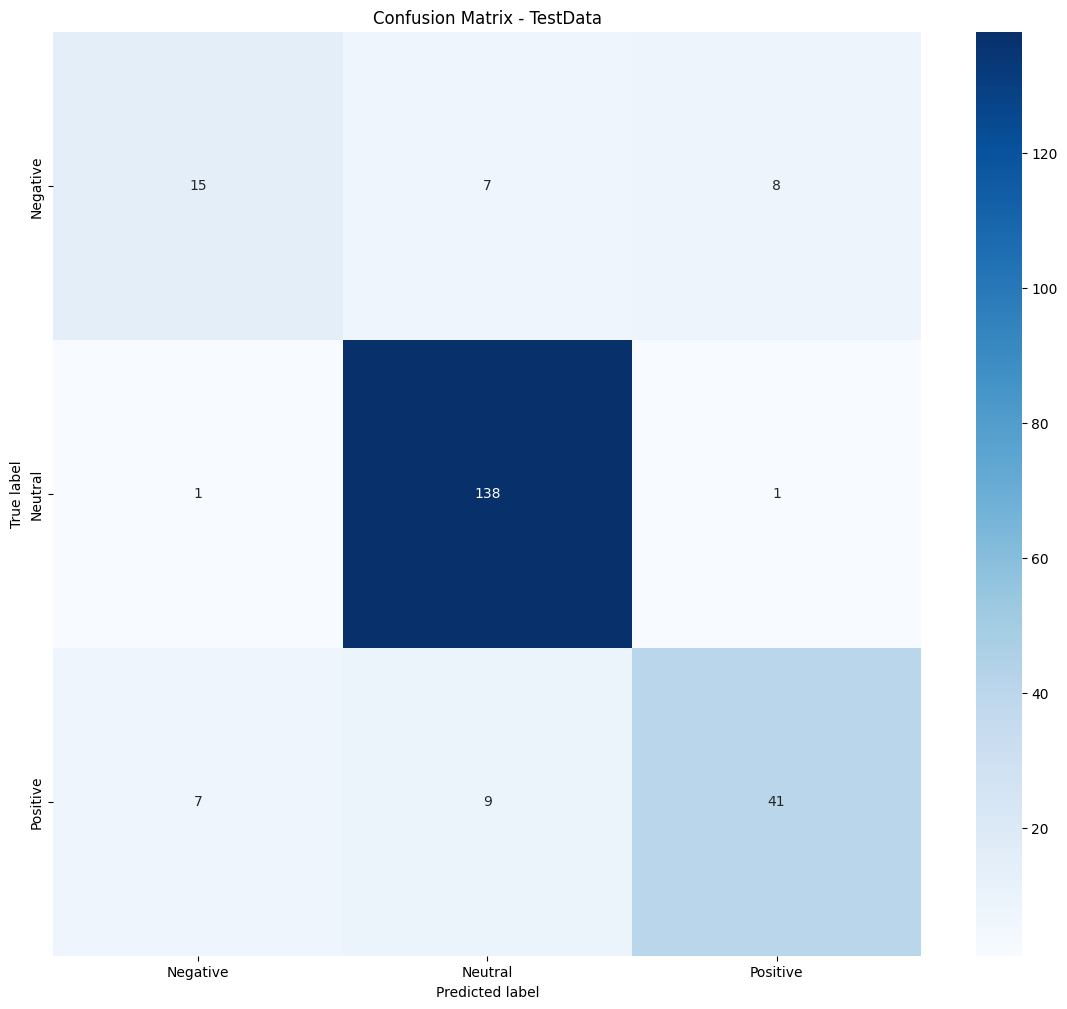

In [ ]:
plot_confusion_matrix(test_labels, y_predictions)